In [4]:
import pandas as pd

In [ ]:
from sklearn.utils import resample

chunksize = 10 ** 5

train_data = pd.DataFrame()
for chunk in pd.read_csv("/Users/maverick/Downloads/BUAN 6341/train_data.csv", chunksize=chunksize):
    train_data = pd.concat([train_data, chunk])
    
train_labels = pd.DataFrame()
for chunk in pd.read_csv("/Users/maverick/Downloads/BUAN 6341/train_labels.csv", chunksize=chunksize):
    train_labels = pd.concat([train_labels, chunk])

# Randomly select 20% of observations from train_labels
sample_labels = resample(train_labels, replace=False, n_samples=int(len(train_labels) * 0.2), random_state=42)

In [4]:
# Merge the sampled labels with train_data
development_sample = train_data.merge(sample_labels[['customer_ID', 'target']], how="inner", on="customer_ID")

# Save the development sample
development_sample.to_csv("/Users/maverick/Downloads/BUAN 6341/development_sample1.csv", index=False)

In [5]:
chunksize = 10 ** 5

development_sample = pd.DataFrame()
for chunk in pd.read_csv("/Users/maverick/Downloads/BUAN 6341/development_sample1.csv", chunksize=chunksize):
    development_sample = pd.concat([development_sample, chunk])

In [3]:
total_samples = len(development_sample)

# Calculate the number of positive responses
positive_responses = development_sample['target'].sum()

# Calculate the response rate
response_rate = positive_responses / total_samples

print(f"Response rate in the original data: {response_rate:.2%}")

Response rate in the original data: 24.65%


In [5]:
# Summary statistics
print("\nSummary statistics:")
print(development_sample.describe())

# Check for missing values
print("\nMissing values:")
print(development_sample.isnull().sum())


Summary statistics:
                P_2          D_39           B_1           B_2           R_1  \
count  1.097940e+06  1.107069e+06  1.107069e+06  1.106702e+06  1.107069e+06   
mean   6.565960e-01  1.532376e-01  1.236050e-01  6.220934e-01  7.905943e-02   
std    2.449943e-01  2.705313e-01  2.115772e-01  4.009464e-01  2.268095e-01   
min   -4.205811e-01  9.052854e-09 -1.832537e+00  5.485064e-08  1.065542e-08   
25%    4.809022e-01  4.535612e-03  8.823934e-03  1.064625e-01  2.892853e-03   
50%    6.950928e-01  9.056126e-03  3.118192e-02  8.143289e-01  5.778174e-03   
75%    8.651769e-01  2.367280e-01  1.256333e-01  1.002380e+00  8.664453e-03   
max    1.010000e+00  5.362196e+00  1.324059e+00  1.010000e+00  3.006102e+00   

                 S_3          D_41           B_3           D_42          D_43  \
count  901108.000000  1.106702e+06  1.106702e+06  157137.000000  7.757750e+05   
mean        0.224457  5.996630e-02  1.322328e-01       0.185299  1.542663e-01   
std         0.191222  2.

In [6]:
def calculate_default_rate(data):
    # Initialize a DataFrame to store the results
    default_rates = pd.DataFrame(columns=["Category", "#Observations", "Default rate"])
    
    # Get the total number of unique customer IDs
    total_customers = len(data["customer_ID"].unique())
    
    # Calculate default rate for all applicants
    default_rate_all = data["target"].mean()
    default_rates.loc[0] = ["All applicants", total_customers, default_rate_all]
    
    # Calculate default rate for each category of historic data length
    for months in range(13, 0, -1):  # Iterate from 13 months to 1 month
        category_customers = data.groupby("customer_ID").size() == months  # Check if each customer has data for the specific number of months
        category_observations = category_customers.sum()  # Get the number of customers in this category
        category_data = data[data["customer_ID"].isin(category_customers[category_customers].index)]  # Filter data for the specific category
        default_rate_category = category_data["target"].mean()  # Calculate default rate for this category
        default_rates.loc[len(default_rates)] = [f"Applications with {months} months of historic data", category_observations, default_rate_category]
    
    return default_rates

# Call the function with your development_sample dataset
default_rates_data = calculate_default_rate(development_sample)

# Display the results
print(default_rates_data)


                                        Category  #Observations  Default rate
0                                 All applicants          91782      0.246501
1   Applications with 13 months of historic data          77347      0.229408
2   Applications with 12 months of historic data           2115      0.378723
3   Applications with 11 months of historic data           1159      0.440897
4   Applications with 10 months of historic data           1329      0.465764
5    Applications with 9 months of historic data           1278      0.435837
6    Applications with 8 months of historic data           1169      0.450813
7    Applications with 7 months of historic data           1046      0.414914
8    Applications with 6 months of historic data           1109      0.412985
9    Applications with 5 months of historic data            933      0.394427
10   Applications with 4 months of historic data            938      0.430704
11   Applications with 3 months of historic data           1158 

In [7]:
default_rates_data.to_excel("default_rates.xlsx", index=False)

In [73]:
# Calculate the counts
count_D = development_sample.columns[development_sample.columns.str.contains('D')].shape[0]
count_S = development_sample.columns[development_sample.columns.str.contains('S')].shape[0]
count_P = development_sample.columns[development_sample.columns.str.contains('P')].shape[0]
count_B = development_sample.columns[development_sample.columns.str.contains('B')].shape[0]
count_R = development_sample.columns[development_sample.columns.str.contains('R')].shape[0]

# Create a DataFrame
feature_counts = pd.DataFrame({
    "Feature Category": ["Delinquency", "Spend", "Payment", "Balance", "Risk"],
    "Number of features": [count_D, count_S, count_P, count_B, count_R]
})

# Save to Excel
feature_counts.to_excel("feature_counts.xlsx", index=False)


In [74]:
# Data size
print(f"Number of rows: {development_sample.shape[0]}")
print(f"Number of columns: {development_sample.shape[1]}")

# Data types of features
print("\nData types:")
print(development_sample.dtypes)

# Snapshot of data
print("\nData snapshot:")
print(development_sample.head())

Number of rows: 1107069
Number of columns: 191

Data types:
customer_ID            object
S_2            datetime64[ns]
P_2                   float64
D_39                  float64
B_1                   float64
                    ...      
D_142                 float64
D_143                 float64
D_144                 float64
D_145                 float64
target                  int64
Length: 191, dtype: object

Data snapshot:
                                         customer_ID        S_2       P_2  \
0  000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-03-11  0.374606   
1  000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-04-22  0.414269   
2  000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-05-12  0.413310   
3  000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-06-10  0.328983   
4  000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52... 2017-07-19  0.496989   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.033519  0.044293  1

In [14]:
development_sample['S_2'] = pd.to_datetime(development_sample['S_2'])

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


# Step 4: One-Hot Encoding
features = development_sample.drop([ 'S_2' ], axis=1).columns.to_list()
cat_col = [i for i in features if i.startswith('B_30')or i.startswith('B_38') or i.startswith('D_114') or 
           i.startswith('D_116')or i.startswith('D_117') or i.startswith('D_120') or i.startswith('D_126') 
           or i.startswith('D_63')or i.startswith('D_64')or i.startswith('D_66') or i.startswith('D_68')]
ind_col = ['customer_ID', 'target']
num_col = [col for col in features if col not in cat_col and col not in ind_col]
# Iterate over each categorical column in cat_col
for col in cat_col:
    # Create dummy variables for the current categorical column
    col_dummies = pd.get_dummies(development_sample[col], prefix=col)
    # Concatenate the dummy variables with the DataFrame
    development_sample = pd.concat([development_sample, col_dummies], axis=1)
    # Drop the original categorical column from the DataFrame
    development_sample.drop(col, axis=1, inplace=True)

# Update cat_col to include the new dummy variable columns
cat_col_updated = [col for col in development_sample.columns if col not in num_col]

# Print the updated cat_col list
print(cat_col_updated)

# Remove 'S_2' and 'customer_ID' from the updated cat_col list
cat_col = [col for col in cat_col_updated if col not in ['S_2', 'customer_ID' , 'target']]

# Print the updated cat_col list
print(cat_col)


KeyboardInterrupt



In [66]:
print(development_sample.shape)

(1107069, 225)


In [67]:
df_num_agg = development_sample.groupby('customer_ID')[num_col].agg(['mean', 'std', 'min', 'max', 'last'])
df_num_agg.columns = ['_'.join(x) for x in df_num_agg.columns]
print(df_num_agg)
print(df_num_agg.shape)
development_sample = pd.merge(development_sample, df_num_agg, on='customer_ID')
print(development_sample.shape)

                                                    P_2_mean   P_2_std  \
customer_ID                                                              
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f523...  0.444606  0.065085   
000445609ff2a39d2dd02484899affa5696210a95f6869f...  0.972260  0.010865   
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff...  0.665203  0.028379   
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab7040...  0.970309  0.005252   
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470f...  0.953131  0.031159   
...                                                      ...       ...   
fffe2bc02423407e33a607660caeed076d713d8a5ad3232...  0.513501  0.097925   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...  0.859327  0.012425   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...  0.786838  0.014312   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...  0.804454  0.037442   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...  0.983617  0.012879   

                                     

(1107069, 1110)


In [70]:
# Define the aggregation window sizes
window_sizes = {'response_rate_6': 6, 'ever_response_12': 12}

# Create an empty DataFrame to store the aggregated categorical features
df_cat_agg = pd.DataFrame()

# Iterate over each categorical feature
for feature in cat_col:
    # Check if the feature is binary (0/1)
    if development_sample[feature].nunique() == 2:
        # Calculate the response rate (percentage of times the feature equals 1) in the last 6 months
        response_rate_6 = development_sample[feature].rolling(window=window_sizes['response_rate_6'], min_periods=1).mean() * 100
        # Check if the feature has ever been responded (contains at least one 1) in the last 12 months
        ever_response_12 = development_sample[feature].rolling(window=window_sizes['ever_response_12'], min_periods=1).max()
        # Add the aggregated features to the DataFrame
        df_cat_agg[f"{feature}_response_rate_6"] = response_rate_6
        df_cat_agg[f"{feature}_ever_response_12"] = ever_response_12
print(df_cat_agg)
print(df_cat_agg.shape)

                                                    D_66_mean  D_66_max  \
customer_ID                                                               
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f523...        NaN       NaN   
000445609ff2a39d2dd02484899affa5696210a95f6869f...        NaN       NaN   
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff...        NaN       NaN   
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab7040...        NaN       NaN   
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470f...        NaN       NaN   
...                                                       ...       ...   
fffe2bc02423407e33a607660caeed076d713d8a5ad3232...        NaN       NaN   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...        NaN       NaN   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...        NaN       NaN   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...        NaN       NaN   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...        NaN       NaN   

                        

In [71]:
development_sample = pd.merge(development_sample, df_cat_agg, on='customer_ID')
print(development_sample.shape)

(1107069, 1208)


In [72]:
# Save the DataFrame to CSV
development_sample.to_csv("final_data_for_project.csv", index=False)

In [15]:
chunksize = 10 ** 5

dev_sample = pd.DataFrame()
for chunk in pd.read_csv("/Users/maverick/Downloads/BUAN 6341/final_data_for_project.csv", chunksize=chunksize):
    dev_sample = pd.concat([dev_sample, chunk])

In [17]:
# Calculate the counts
count_D = dev_sample.columns[dev_sample.columns.str.contains('D')].shape[0]
count_S = dev_sample.columns[dev_sample.columns.str.contains('S')].shape[0]
count_P = dev_sample.columns[dev_sample.columns.str.contains('P')].shape[0]
count_B = dev_sample.columns[dev_sample.columns.str.contains('B')].shape[0]
count_R = dev_sample.columns[dev_sample.columns.str.contains('R')].shape[0]

# Create a DataFrame
feature_counts_final = pd.DataFrame({
    "Feature Category": ["Delinquency", "Spend", "Payment", "Balance", "Risk"],
    "Number of features": [count_D, count_S, count_P, count_B, count_R]
})

# Save to Excel
feature_counts_final.to_excel("feature_counts_final.xlsx", index=False)


In [18]:
dev_sample['S_2'] = pd.to_datetime(dev_sample['S_2'])

# Data types of features
print("\nData types:")
print(dev_sample.dtypes)


Data types:
customer_ID                            object
S_2                            datetime64[ns]
P_2                                   float64
D_39                                  float64
B_1                                   float64
                                    ...      
D_126_-1.0_ever_response_12           float64
D_126_0.0_response_rate_6             float64
D_126_0.0_ever_response_12            float64
D_126_1.0_response_rate_6             float64
D_126_1.0_ever_response_12            float64
Length: 1208, dtype: object


In [82]:
# Step 6: Train/Test Split
from sklearn.model_selection import train_test_split

X = dev_sample.drop(['target','S_2','customer_ID'], axis=1)
Y = dev_sample['target']

# Splitting into 70% training and 30% testing
X_train, X_test_combined, Y_train, y_test_combined = train_test_split(X, Y, test_size=0.3, random_state=42)

# Splitting the combined test set into two equal parts
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test_combined, y_test_combined, test_size=0.5, random_state=42)

In [75]:
print (X_train.shape)
print (Y_train.shape)
print (X_test1.shape)
print (Y_test1.shape)
print (X_test2.shape)
print (Y_test2.shape)

(774948, 27)
(774948,)
(166060, 27)
(166060,)
(166061, 27)
(166061,)


In [82]:
# Step 7-10: Feature Selection
from xgboost import XGBClassifier


# for this step, we don't play with parameters of RF, and just use the
model_for_feature_reduction = XGBClassifier()
model_for_feature_reduction.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
Feature_Importance = pd.DataFrame(columns = ["Feature", "Feature_Importance"])
Feature_Importance.Feature = X_train.columns
Feature_Importance.Feature_Importance = model_for_feature_reduction.feature_importances_
Feature_Importance.sort_values(by=["Feature_Importance"], inplace=True, ascending=False)
Feature_Importance
Feature_Importance.to_csv("Feature_Importance.csv", index=False)

In [76]:
Feature_Importance

,Feature,Feature_Importance
0,P_2_last,0.140401
1,B_1_last,0.043715
2,B_2_last,0.011351
3,D_44_max,0.010522
4,R_1_last,0.009361
...,...,...
1200,D_109,0.000000
1201,D_110,0.000000
1202,D_111,0.000000
1203,B_39,0.000000


In [85]:
params = {
    'n_estimators': 300,
    'learning_rate': 0.5,
    'max_depth': 4,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 5,
    'random_state': 42  # Set random state for reproducibility
}

# Initialize XGBoost model
model_for_feature_reduction_2 = xgb.XGBClassifier(**params)
# Train the model
model_for_feature_reduction_2.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [86]:
Feature_Importance_2 = pd.DataFrame(columns = ["Feature", "Feature_Importance"])
Feature_Importance_2.Feature = X_train.columns
Feature_Importance_2.Feature_Importance = model_for_feature_reduction_2.feature_importances_
Feature_Importance_2.sort_values(by=["Feature_Importance"], inplace=True, ascending=False)
Feature_Importance_2
Feature_Importance_2.to_csv("Feature_Importance_2.csv", index=False)

In [77]:
Feature_Importance_2

,Feature,Feature_Importance
0,P_2_last,0.101582
1,P_2_min,0.049019
2,B_2_last,0.043612
3,B_23_mean,0.029483
4,D_44_last,0.021654
...,...,...
1200,D_106,0.000000
1201,D_107,0.000000
1202,B_36,0.000000
1203,B_37,0.000000


In [18]:
chunksize = 10 ** 5

Feature_Importance = pd.DataFrame()
for chunk in pd.read_csv("/Users/maverick/Downloads/BUAN 6341/Feature_Importance.csv", chunksize=chunksize):
    Feature_Importance = pd.concat([Feature_Importance, chunk])
    
chunksize = 10 ** 5

Feature_Importance_2 = pd.DataFrame()
for chunk in pd.read_csv("/Users/maverick/Downloads/BUAN 6341/Feature_Importance_2.csv", chunksize=chunksize):
    Feature_Importance_2 = pd.concat([Feature_Importance_2, chunk])

In [78]:
features_to_keep = Feature_Importance[Feature_Importance.Feature_Importance >= 0.005]["Feature"]
features_to_keep

0     P_2_last
1     B_1_last
2     B_2_last
3     D_44_max
4     R_1_last
5    B_23_last
6     R_2_last
7    D_42_mean
Name: Feature, dtype: object

In [79]:
features_to_keep_2 = Feature_Importance_2[Feature_Importance_2.Feature_Importance >= 0.005]["Feature"]
features_to_keep_2

0      P_2_last
1       P_2_min
2      B_2_last
3     B_23_mean
4     D_44_last
5      B_1_last
6      B_2_mean
7       R_1_std
8     D_48_last
9     D_43_mean
10    D_111_min
11      B_7_std
12     B_7_last
13     S_7_last
14     B_9_last
15    D_42_last
16     B_3_last
17         D_56
18         B_19
19    D_45_last
20     S_3_mean
21     D_66_max
Name: Feature, dtype: object

In [80]:
all_features_to_keep = pd.concat([features_to_keep, features_to_keep_2]).unique()
all_features_to_keep

array(['P_2_last', 'B_1_last', 'B_2_last', 'D_44_max', 'R_1_last',
       'B_23_last', 'R_2_last', 'D_42_mean', 'P_2_min', 'B_23_mean',
       'D_44_last', 'B_2_mean', 'R_1_std', 'D_48_last', 'D_43_mean',
       'D_111_min', 'B_7_std', 'B_7_last', 'S_7_last', 'B_9_last',
       'D_42_last', 'B_3_last', 'D_56', 'B_19', 'D_45_last', 'S_3_mean',
       'D_66_max'], dtype=object)

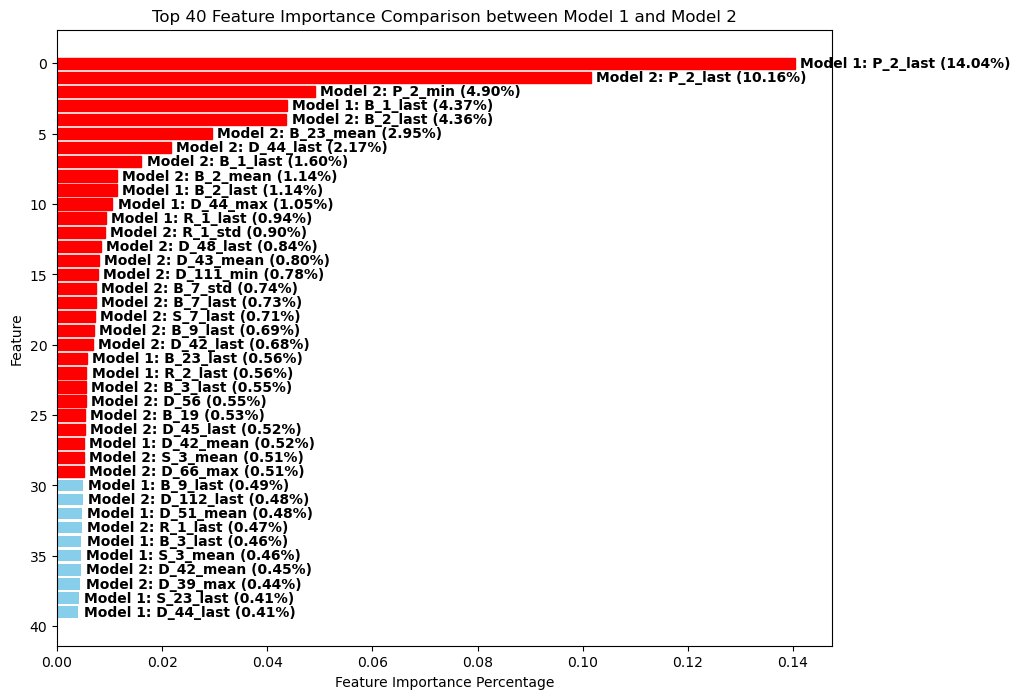

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load feature importance from the first model
feature_importance_df1 = pd.read_csv('feature_importance.csv')
feature_importance_df1['Model'] = 'Model 1'

# Load feature importance from the second model
feature_importance_df2 = pd.read_csv('Feature_Importance_2.csv')
feature_importance_df2['Model'] = 'Model 2'

# Concatenate both DataFrames
combined_feature_importance = pd.concat([feature_importance_df1, feature_importance_df2])

# Sort the combined DataFrame by importance values in descending order
combined_feature_importance.sort_values(by='Feature_Importance', ascending=False, inplace=True)

# Filter the top 30 features
top_30_features = combined_feature_importance.head(40)

# Plotting
plt.figure(figsize=(10, 8))

# Plot horizontal bars
bars = plt.barh(range(len(top_30_features)), top_30_features['Feature_Importance'], color='skyblue')

# Add labels for model name and percentage
for i, bar in enumerate(bars):
    feature = top_30_features.iloc[i]['Feature']
    importance = top_30_features.iloc[i]['Feature_Importance']
    model = top_30_features.iloc[i]['Model']
    if importance > 0.005:
        bar.set_color('red')
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{model}: {feature} ({importance:.2%})', va='center', ha='left', fontsize=10, color='black', weight='bold')

# Add labels and title
plt.xlabel('Feature Importance Percentage')
plt.ylabel('Feature')
plt.title('Top 40 Feature Importance Comparison between Model 1 and Model 2')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top

# Show plot
plt.show()


In [81]:
X_train = X_train[all_features_to_keep]
X_test1 = X_test1[all_features_to_keep]
X_test2 = X_test2[all_features_to_keep]

In [82]:
X_test2

,P_2_last,B_1_last,B_2_last,D_44_max,R_1_last,B_23_last,R_2_last,D_42_mean,P_2_min,B_23_mean,...,B_7_last,S_7_last,B_9_last,D_42_last,B_3_last,D_56,B_19,D_45_last,S_3_mean,D_66_max
0,1.128684,-0.582375,0.528716,-0.666472,-0.381111,-0.763594,-0.288591,NaN,0.580923,-0.731066,...,-0.826913,-0.822238,-0.739133,NaN,-0.606962,-1.067491,-0.511323,-0.311127,-0.809723,NaN
1,-0.931532,0.330451,-0.948745,-0.191370,-0.349940,-0.359838,-0.274334,NaN,-0.670736,-0.384203,...,-0.364305,1.118677,0.679385,NaN,0.087523,NaN,-0.505034,-0.755419,0.384613,NaN
2,-0.886037,-0.490367,-0.136985,-0.174645,-0.383079,-0.713408,-0.273110,-0.811323,-1.172275,-0.737099,...,-0.698277,-0.234448,0.520206,-0.813152,-0.503980,2.587224,-0.508042,-0.876054,-0.491418,NaN
3,-2.167350,4.194020,-1.442914,NaN,-0.367676,3.595537,3.454042,NaN,-2.223537,3.134186,...,3.480987,-0.348573,1.881178,NaN,-0.609044,-0.589285,2.634223,0.107487,0.470205,NaN
4,0.181076,-0.573409,0.520335,-0.663935,-0.384111,-0.738030,-0.283801,NaN,0.435137,-0.684662,...,-0.782101,-0.497229,-0.718824,NaN,-0.532336,NaN,-0.489827,-0.457171,-0.262641,0.349910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166056,0.211570,0.445720,-1.433811,-0.177246,-0.365912,0.106876,3.448395,NaN,-0.461825,0.122604,...,0.091509,0.415151,1.610361,NaN,1.422006,0.183337,1.212642,-0.667496,2.484822,NaN
166057,-1.292102,-0.568142,0.521044,1.268948,3.313541,0.857060,3.458489,0.355446,-1.623662,0.568139,...,0.947179,-0.178325,-0.735726,0.372766,-0.604613,NaN,-0.510357,-0.912885,-0.365877,NaN
166058,-2.074876,-0.230568,-1.423982,-0.659120,-0.385119,-0.518147,-0.284580,NaN,-1.905234,-0.568762,...,-0.472939,0.119175,0.027824,NaN,-0.426249,NaN,1.244098,-0.746185,-0.089528,NaN
166059,0.863744,-0.586670,0.523121,-0.658061,-0.386033,0.567533,-0.301054,NaN,0.615877,0.171281,...,0.924717,NaN,-0.732076,NaN,-0.608155,NaN,-0.496243,-0.689200,NaN,-2.857882


In [96]:
from sklearn.metrics import roc_auc_score

In [31]:
# Step 11: XGBoost Grid Search
Grid_Search_Results = pd.DataFrame(columns = ["Number Trees", "Learning Rate", 'Subsample', '% Features', 'Weight of Default',"AUC Train", "AUC Test 1", "AUC Test 2"])

Counter = 0
for n_trees in [50, 100, 300]:
    for lr in [0.01, 0.1]:
        for subsample in [0.5, 0.8]:
            for colsample in [0.5, 1.0]:
                for weight in [1, 5, 10]:
                    xgb_instance = XGBClassifier(n_estimators= n_trees, learning_rate = lr,subsample=subsample, colsample_bytree=colsample, scale_pos_weight=weight)
                    model = xgb_instance.fit(X_train, Y_train)
                    Grid_Search_Results.loc[Counter,"Number Trees"] = n_trees
                    Grid_Search_Results.loc[Counter,"Learning Rate"] = lr
                    Grid_Search_Results.loc[Counter,"Subsample"] = subsample
                    Grid_Search_Results.loc[Counter,"% Features"] = colsample
                    Grid_Search_Results.loc[Counter,"Weight of Default"] = weight
                    Grid_Search_Results.loc[Counter,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])
                    Grid_Search_Results.loc[Counter,"AUC Test 1"] = roc_auc_score(Y_test1, model.predict_proba(X_test1)[:,1])
                    Grid_Search_Results.loc[Counter,"AUC Test 2"] = roc_auc_score(Y_test2, model.predict_proba(X_test2)[:,1])

                    Counter = Counter + 1
                    Grid_Search_Results.to_csv("/Users/maverick/Downloads/BUAN 6341/Grid_Search_Results.csv")

NameError: name 'XGBClassifier' is not defined

In [27]:
print(Grid_Search_Results)

    Number Trees  Learning Rate  Subsample  % Features  Weight of Default  \
0             50           0.01        0.5         0.5                  1   
1             50           0.01        0.5         0.5                  5   
2             50           0.01        0.5         0.5                 10   
3             50           0.01        0.5         1.0                  1   
4             50           0.01        0.5         1.0                  5   
..           ...            ...        ...         ...                ...   
67           300           0.10        0.8         0.5                  5   
68           300           0.10        0.8         0.5                 10   
69           300           0.10        0.8         1.0                  1   
70           300           0.10        0.8         1.0                  5   
71           300           0.10        0.8         1.0                 10   

    AUC Train  AUC Test 1  AUC Test 2   AUC AVG    AUC SD  
0    0.954004  

In [5]:
Grid_Search_Results = pd.read_csv('Grid_Search_Results.csv')
Grid_Search_Results.drop(columns=['Unnamed: 0'], inplace=True)

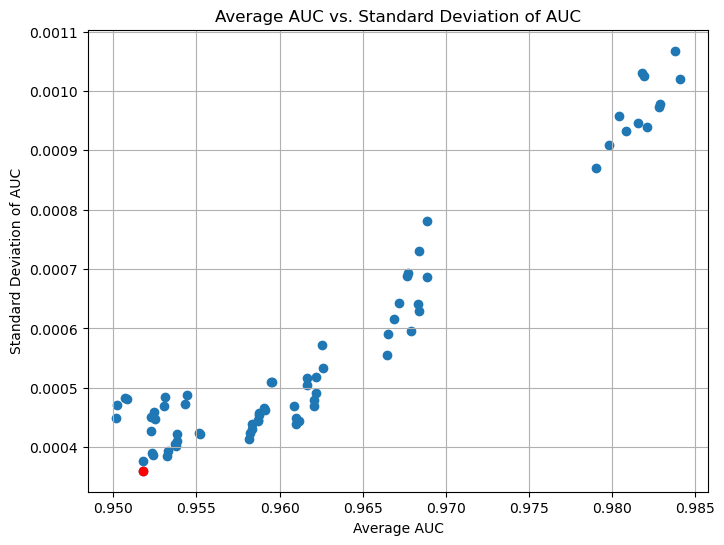

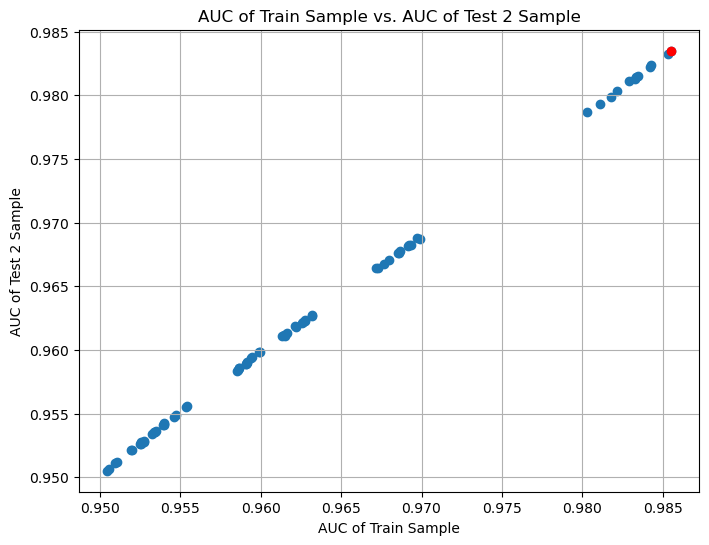

Parameters of the 1st Scatter plot best point:
Number Trees         50.000000
Learning Rate         0.010000
Subsample             0.500000
% Features            0.500000
Weight of Default    10.000000
AUC Train             0.951920
AUC Test 1            0.951274
AUC Test 2            0.952118
AUC AVG               0.951771
AUC SD                0.000360
Name: 2, dtype: float64

Parameters of the 2nd Scatter plot best point:
Number Trees         300.000000
Learning Rate          0.100000
Subsample              0.500000
% Features             1.000000
Weight of Default      1.000000
AUC Train              0.985521
AUC Test 1             0.983233
AUC Test 2             0.983504
AUC AVG                0.984086
AUC SD                 0.001021
Name: 63, dtype: float64


In [26]:
import matplotlib.pyplot as plt

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.figure(figsize=(8, 6))
plt.scatter(Grid_Search_Results['AUC AVG'], Grid_Search_Results['AUC SD'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')
plt.grid(True)

# Find the lowest and highest points
lowest_index = Grid_Search_Results['AUC SD'].idxmin()

# Mark the lowest and highest points in red
plt.scatter(Grid_Search_Results.loc[lowest_index, 'AUC AVG'], Grid_Search_Results.loc[lowest_index, 'AUC SD'], color='red')

plt.show()

# Scatter plot for AUC of Test 2 Sample vs. AUC of Train Sample
plt.figure(figsize=(8, 6))
plt.scatter(Grid_Search_Results['AUC Train'], Grid_Search_Results['AUC Test 2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs. AUC of Test 2 Sample')
plt.grid(True)

# Find the lowest and highest points
highest_index = Grid_Search_Results['AUC Train'].idxmax()

# Mark the lowest and highest points in red

plt.scatter(Grid_Search_Results.loc[highest_index, 'AUC Train'], Grid_Search_Results.loc[highest_index, 'AUC Test 2'], color='red')

plt.show()

# Print the parameters of the lowest and highest points
print("Parameters of the 1st Scatter plot best point:")
print(Grid_Search_Results.loc[lowest_index])
print("\nParameters of the 2nd Scatter plot best point:")
print(Grid_Search_Results.loc[highest_index])


In [29]:
# Step 12: Choose best XGBoost model based on AUC SD

best_model_idx = Grid_Search_Results['AUC SD'].idxmin()
best_params = Grid_Search_Results.iloc[best_model_idx, :5].to_dict()

best_params

{'Number Trees': 50.0,
 'Learning Rate': 0.01,
 'Subsample': 0.5,
 '% Features': 0.5,
 'Weight of Default': 10.0}

In [77]:
best_xgb_instance = xgb.XGBClassifier(
    n_estimators=int(best_params['Number Trees']),
    learning_rate=best_params['Learning Rate'],
    subsample=best_params['Subsample'],
    colsample_bytree=best_params['% Features'],
    scale_pos_weight=best_params['Weight of Default']
)

# Fit the model on the training data
best_xgb_model = best_xgb_instance.fit(X_train, Y_train)

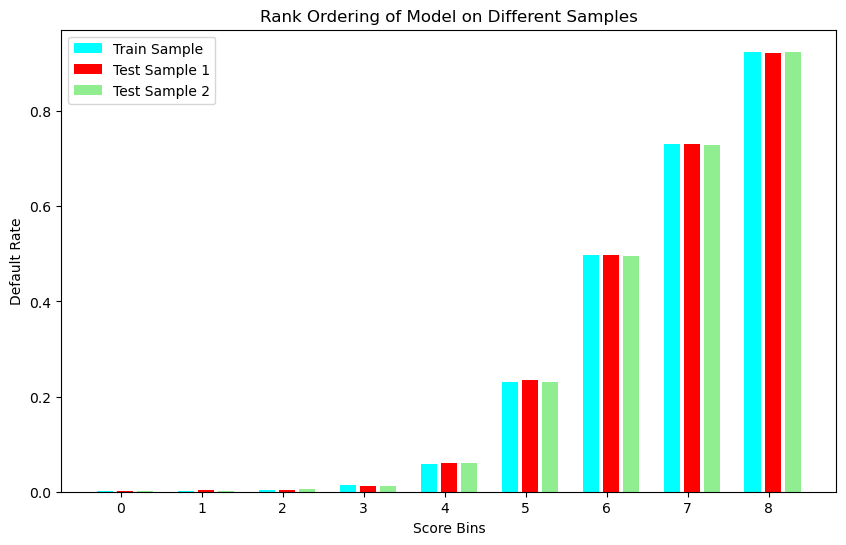

AUC on Train Sample: 0.951919878411926
AUC on Test Sample 1: 0.9512741189323174
AUC on Test Sample 2: 0.9521184861921141


In [42]:
# Calculate AUC for each sample
train_auc = roc_auc_score(Y_train, best_xgb_model.predict_proba(X_train)[:, 1])
test1_auc = roc_auc_score(Y_test1, best_xgb_model.predict_proba(X_test1)[:, 1])
test2_auc = roc_auc_score(Y_test2, best_xgb_model.predict_proba(X_test2)[:, 1])

# Create score bins for each sample
train_bins = pd.qcut(best_xgb_model.predict_proba(X_train)[:, 1], q=10, labels=False, duplicates='drop')
test1_bins = pd.qcut(best_xgb_model.predict_proba(X_test1)[:, 1], q=10, labels=False, duplicates='drop')
test2_bins = pd.qcut(best_xgb_model.predict_proba(X_test2)[:, 1], q=10, labels=False, duplicates='drop')

# Calculate default rate in each bin for each sample
train_default_rate = [Y_train[train_bins == i].mean() for i in range(train_bins.max() + 1)]
test1_default_rate = [Y_test1[test1_bins == i].mean() for i in range(test1_bins.max() + 1)]
test2_default_rate = [Y_test2[test2_bins == i].mean() for i in range(test2_bins.max() + 1)]

# Plot the rank orderings in a bar chart with a gap between bars of the same bin
plt.figure(figsize=(10, 6))
index = np.arange(train_bins.max() + 1)
bar_width = 0.2  # Adjust the width of the bars
gap = 0.05  # Define the size of the gap between bars

plt.bar(index, train_default_rate, bar_width, color='cyan', label='Train Sample')
plt.bar(index + bar_width + gap, test1_default_rate, bar_width, color='red', label='Test Sample 1')
plt.bar(index + 2 * (bar_width + gap), test2_default_rate, bar_width, color='lightgreen', label='Test Sample 2')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Ordering of Model on Different Samples')
plt.xticks(index + bar_width, range(train_bins.max() + 1))
plt.legend()
plt.show()


# Display AUC of the model on each sample
print("AUC on Train Sample:", train_auc)
print("AUC on Test Sample 1:", test1_auc)
print("AUC on Test Sample 2:", test2_auc)


In [34]:
import pandas as pd
import numpy as np
import shap

# 1. Get SHAP values
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer.shap_values(X_train)  # Assuming X_train is your training data

# 2. Identify top 5 features
top_features_idx = np.argsort(-np.abs(shap_values.mean(0)))[:5]
top_features = [X_train.columns[i] for i in top_features_idx]

# 3. Calculate summary statistics for top 5 features
summary_stats = pd.DataFrame(columns=["Feature", "Min", "1st Percentile", "5th Percentile", "Median", "95th Percentile", "99th Percentile", "Max", "Mean", "% Missing"])

for feature in top_features:
    feature_values = X_train[feature]
    summary_stats.loc[len(summary_stats)] = [
        feature,
        feature_values.min(),
        np.percentile(feature_values, 1),
        np.percentile(feature_values, 5),
        feature_values.median(),
        np.percentile(feature_values, 95),
        np.percentile(feature_values, 99),
        feature_values.max(),
        feature_values.mean(),
        (feature_values.isnull().sum() / len(feature_values)) * 100
    ]

# 4. Create table
summary_stats.to_excel("top_features_summary_statistics.xlsx", index=False)


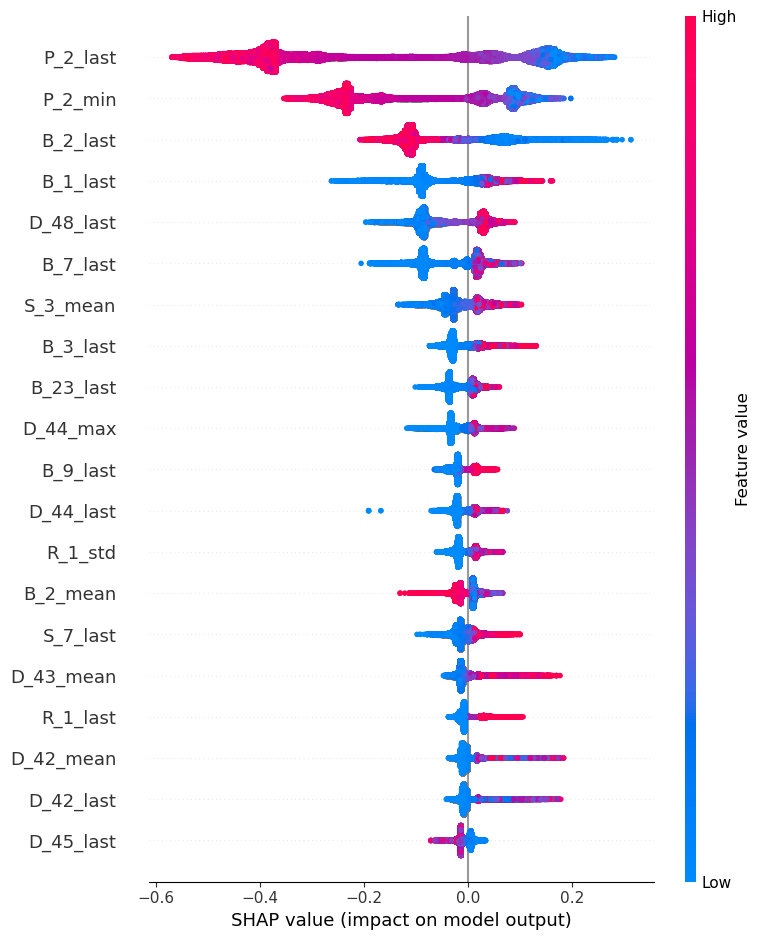

In [88]:
import shap
import matplotlib.pyplot as plt

# Initialize the TreeExplainer with the final XGBoost model
explainer = shap.Explainer(best_xgb_model)

# Calculate SHAP values for the Test 2 sample
shap_values = explainer.shap_values(X_test2)

# Create the beeswarm plot for the SHAP values
shap.summary_plot(shap_values, X_test2, plot_type="dot")

# Show the plot
plt.show()


In [110]:
explainer = shap.Explainer(best_xgb_model,X_test2)
shap_values = explainer(X_test2)

100%|===================| 165763/166061 [08:40<00:00]        

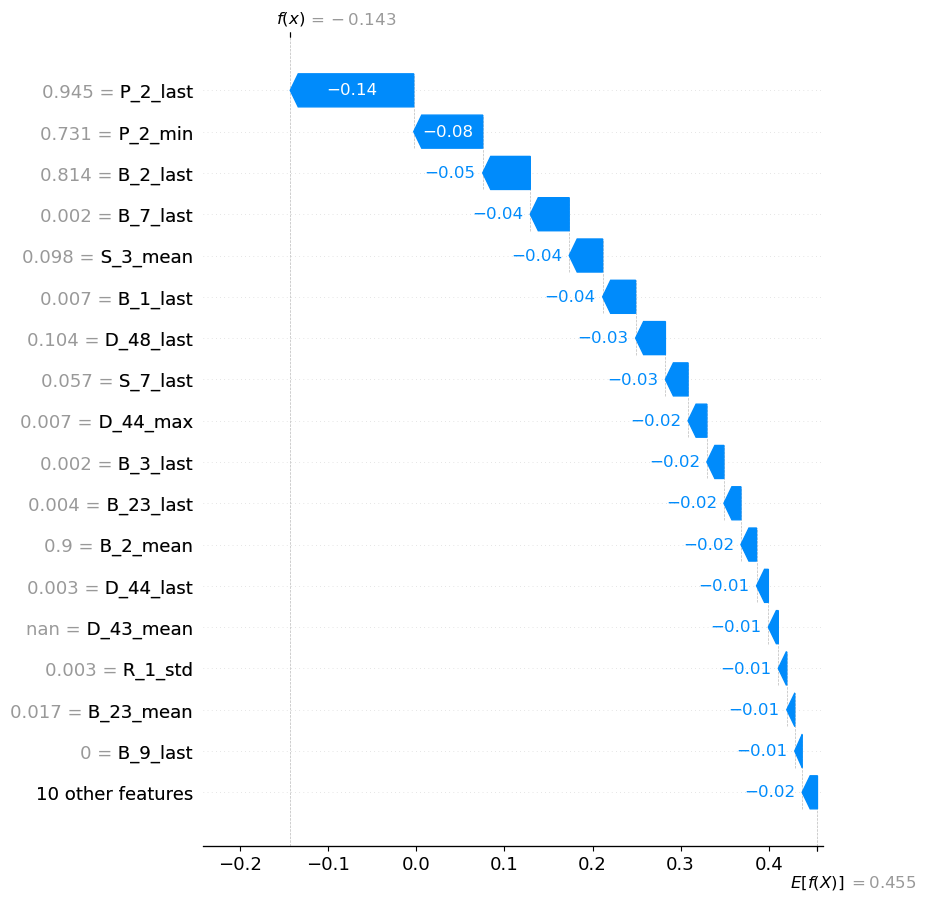

In [111]:
shap.plots.waterfall(shap_values[0], max_display=18)

In [113]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [83]:
# Step 13: Data Processing for Neural Network
outlier = pd.DataFrame(columns=["Column Name", "P1", "P99"])

counter = 0
for feature in all_features_to_keep:
    outlier.loc[counter, "Column Name"] = feature
    outlier.loc[counter, "P1"] = dev_sample[feature].quantile(0.01)
    outlier.loc[counter, "P99"] = dev_sample[feature].quantile(0.99)
    counter += 1

outlier

,Column Name,P1,P99
0,P_2_last,-0.083832,1.006322
1,B_1_last,0.000496,1.054248
2,B_2_last,0.001835,1.009701
3,D_44_max,0.006981,1.255546
4,R_1_last,0.000112,1.502031
5,B_23_last,0.001447,1.045133
6,R_2_last,0.00011,1.008703
7,D_42_mean,0.004561,0.947784
8,P_2_min,-0.129115,0.978856
9,B_23_mean,0.005064,0.902647


In [84]:
# Next we replace outlers with P1 and P99
import numpy as np

for counter in range (outlier.shape[0]):
    X_train[outlier.loc[counter, "Column Name"]] = np.where(X_train[outlier.loc[counter, "Column Name"]] < outlier.loc[counter, "P1"],
                                                       outlier.loc[counter, "P1"], X_train[outlier.loc[counter, "Column Name"]])

    X_train[outlier.loc[counter, "Column Name"]] = np.where(X_train[outlier.loc[counter, "Column Name"]] > outlier.loc[counter, "P99"],
                                                       outlier.loc[counter, "P99"], X_train[outlier.loc[counter, "Column Name"]])


In [85]:
# Next we do the same for test samples. Note we use the same P1/P99 that we got from train sample.
# Test sample represents unseen data, and should not be used in any stage of the model, including data processing.

for counter in range (outlier.shape[0]):
    X_test1[outlier.loc[counter, "Column Name"]] = np.where(X_test1[outlier.loc[counter, "Column Name"]] < outlier.loc[counter, "P1"],
                                                       outlier.loc[counter, "P1"], X_test1[outlier.loc[counter, "Column Name"]])

    X_test2[outlier.loc[counter, "Column Name"]] = np.where(X_test2[outlier.loc[counter, "Column Name"]] < outlier.loc[counter, "P1"],
                                                       outlier.loc[counter, "P1"], X_test2[outlier.loc[counter, "Column Name"]])

    X_test1[outlier.loc[counter, "Column Name"]] = np.where(X_test1[outlier.loc[counter, "Column Name"]] > outlier.loc[counter, "P99"],
                                                       outlier.loc[counter, "P99"], X_test1[outlier.loc[counter, "Column Name"]])

    X_test2[outlier.loc[counter, "Column Name"]] = np.where(X_test2[outlier.loc[counter, "Column Name"]] > outlier.loc[counter, "P99"],
                                                       outlier.loc[counter, "P99"], X_test2[outlier.loc[counter, "Column Name"]])


In [86]:
# Feature Scaling: We will use StandardScaler. There are other scaling options such as Min-Max Scaler.
# No matter which technique to use, again scaling parameters (here mean and STD) should come from the train sample.
# To find scaling parameters, we use a sklearn package.

# get scaling parameters
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

# scale features
X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test1 = pd.DataFrame(sc.transform(X_test1), columns = X_test1.columns)
X_test2 = pd.DataFrame(sc.transform(X_test2), columns = X_test2.columns)

In [89]:
# For missing value imputation, we replace all missing values with 0
X_train

,P_2_last,B_1_last,B_2_last,D_44_max,R_1_last,B_23_last,R_2_last,D_42_mean,P_2_min,B_23_mean,...,B_7_last,S_7_last,B_9_last,D_42_last,B_3_last,D_56,B_19,D_45_last,S_3_mean,D_66_max
0,-0.966288,1.349621,-1.117208,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.964070,-0.617020,...,-0.616784,-0.600578,1.675874,0.000000,0.079109,-0.586214,-0.502337,-0.680715,-0.580367,0.00000
1,1.011486,-0.514099,1.275019,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,0.867378,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,1.834790,-0.502337,-0.680715,-0.580367,0.00000
2,1.451301,-0.514099,1.221124,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.964070,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,-0.586214,-0.502337,1.894788,-0.580367,0.00000
3,0.018414,-0.366510,-1.117208,0.074036,-0.409942,1.973811,-0.290289,0.000000,-0.091535,1.904016,...,1.933199,-0.600578,-0.648251,0.000000,0.675470,-0.586214,2.170239,0.420610,-0.580367,0.00000
4,-0.646213,-0.514099,1.223138,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.338993,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,0.000000,-0.155421,0.889429,-0.580367,0.34991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774943,-0.677363,-0.514099,1.259559,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.078437,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,2.202494,-0.502337,1.894788,-0.580367,0.00000
774944,-0.966288,0.464614,-1.117208,2.245310,-0.409942,1.887451,-0.290289,-0.619731,-0.964070,0.953326,...,1.766785,-0.079756,1.675874,-0.622858,0.192511,0.000000,2.170239,-0.680715,2.082224,0.00000
774945,-0.966288,1.286021,-1.117208,1.138443,2.539664,1.973811,3.444838,0.000000,-0.964070,1.904016,...,1.933199,2.040392,1.675874,0.000000,2.084836,0.000000,-0.502337,1.894788,2.082224,0.00000
774946,-0.392221,-0.514099,1.224470,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.964070,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,0.000000,-0.502337,-0.680715,-0.580367,0.00000


In [88]:
# For missing value imputation, we replace all missing values with 0
X_train.fillna(0,inplace=True)
X_test1.fillna(0,inplace=True)
X_test2.fillna(0,inplace=True)

In [13]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

2024-03-29 19:08:35.452374: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [128]:
from sklearn.metrics import roc_auc_score

In [130]:
Grid_Search_Results_nn = pd.DataFrame(columns = ["HL", "Nodes", "Activation Function","Dropout", "Batch Size",
                                              "AUC Train", "AUC Test 1", "AUC Test 2"])

In [135]:
Counter = 0
for n_layers in [2, 4]:
    for n_nodes in [4, 6]:
        for activation in ['relu', 'tanh']:
            for dropout in [0 , 0.5]:
                for batch_size in [100, 10000]:
                    model = Sequential()
                    model.add(Dense(n_nodes, input_dim=X_train_nn.shape[1], activation=activation))
                    model.add(Dropout(dropout))
                    for _ in range(n_layers - 1):
                        model.add(Dense(n_nodes, activation=activation))
                        model.add(Dropout(dropout))
                    model.add(Dense(1, activation='sigmoid'))
                    model.compile(optimizer=Adam(), loss=BinaryCrossentropy())
                    model.fit(X_train_nn, Y_train, batch_size=batch_size, epochs=20, verbose=0)

                    Grid_Search_Results_nn.loc[Counter,"HL"] = n_layers
                    Grid_Search_Results_nn.loc[Counter,"Nodes"] = n_nodes
                    Grid_Search_Results_nn.loc[Counter,"Activation Function"] = activation
                    Grid_Search_Results_nn.loc[Counter,"Dropout"] = dropout
                    Grid_Search_Results_nn.loc[Counter,"Batch Size"] = batch_size
                    Grid_Search_Results_nn.loc[Counter,"AUC Train"] = roc_auc_score(Y_train, model.predict(X_train))
                    Grid_Search_Results_nn.loc[Counter,"AUC Test 1"] = roc_auc_score(Y_test1, model.predict(X_test1))
                    Grid_Search_Results_nn.loc[Counter,"AUC Test 2"] = roc_auc_score(Y_test2, model.predict(X_test2))

                    Counter = Counter + 1
                    Grid_Search_Results_nn.to_csv("/Users/maverick/Downloads/BUAN 6341/Grid_Search_Results_NN.csv")

24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 594us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 540us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 536us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 13s 555us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 543us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 16s 642us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 543us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 537us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 574us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 19s 771us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 4s 850us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 5s 871us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 17s 699us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 509us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 487us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 18s 726us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 558us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 519us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 12s 513us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 505us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 509us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 13s 554us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 499us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 513us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 561us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 523us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 509us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 18s 725us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 535us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 13s 533us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 502us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 506us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 584us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 511us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 518us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 558us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 540us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 580us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 578us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 558us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 550us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 570us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 540us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 519us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 595us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 513us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 529us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 569us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 533us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 532us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 16s 675us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 543us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 520us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 16s 638us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 529us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 628us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 525us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 564us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 598us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 539us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 611us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 16s 640us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 520us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 540us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 607us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 546us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 561us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 605us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 568us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 559us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 16s 647us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 590us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 4s 743us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 612us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 536us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 633us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 566us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 549us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 16s 648us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 581us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 588us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 530us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 535us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 16s 645us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 550us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 588us/step


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 632us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 583us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 610us/step


In [7]:
Grid_Search_Results_nn = pd.read_csv('Grid_Search_Results_NN.csv')
Grid_Search_Results_nn.drop(columns=['Unnamed: 0'], inplace=True)

In [90]:
AUC_AVG = (Grid_Search_Results_nn['AUC Train'] + Grid_Search_Results_nn['AUC Test 1'] + Grid_Search_Results_nn['AUC Test 2']) / 3
AUC_SD = []
for i in range(32):
    AUC_SD.append(np.std([Grid_Search_Results_nn['AUC Train'][i], Grid_Search_Results_nn['AUC Test 1'][i], Grid_Search_Results_nn['AUC Test 2'][i]]))

Grid_Search_Results_nn['AUC AVG'] = AUC_AVG
Grid_Search_Results_nn['AUC SD'] = AUC_SD
Grid_Search_Results_nn.to_csv("/Users/maverick/Downloads/BUAN 6341/Grid_Search_Results_NN.csv")

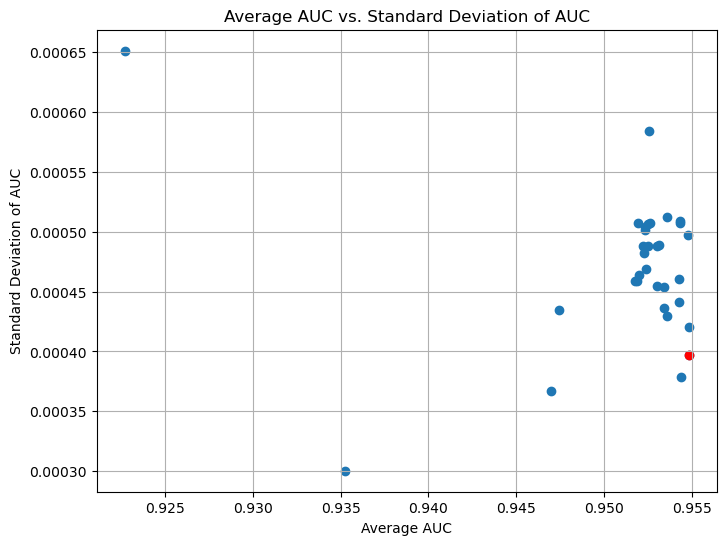

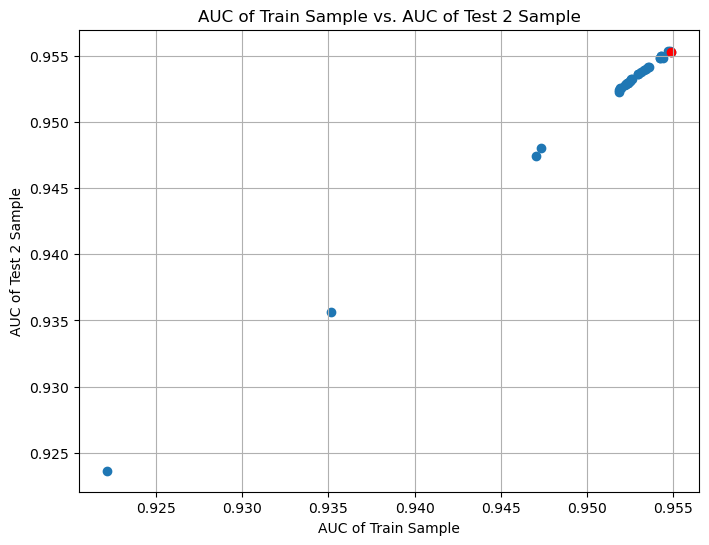

Parameters of the 1st Scatter plot best point:
HL                            4
Nodes                         6
Activation Function        tanh
Dropout                     0.0
Batch Size                  100
AUC Train              0.954862
AUC Test 1             0.954323
AUC Test 2             0.955293
AUC AVG                0.954826
AUC SD                 0.000397
Name: 28, dtype: object

Parameters of the 2nd Scatter plot best point:
HL                            4
Nodes                         6
Activation Function        tanh
Dropout                     0.0
Batch Size                  100
AUC Train              0.954862
AUC Test 1             0.954323
AUC Test 2             0.955293
AUC AVG                0.954826
AUC SD                 0.000397
Name: 28, dtype: object


In [124]:
import matplotlib.pyplot as plt

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.figure(figsize=(8, 6))
plt.scatter(Grid_Search_Results_nn['AUC AVG'], Grid_Search_Results_nn['AUC SD'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')
plt.grid(True)

# Find the lowest and highest points
right_index = Grid_Search_Results_nn['AUC AVG'].idxmax()

# Mark the lowest and highest points in red
plt.scatter(Grid_Search_Results_nn.loc[right_index, 'AUC AVG'], Grid_Search_Results_nn.loc[right_index, 'AUC SD'], color='red')

plt.show()

# Scatter plot for AUC of Test 2 Sample vs. AUC of Train Sample
plt.figure(figsize=(8, 6))
plt.scatter(Grid_Search_Results_nn['AUC Train'], Grid_Search_Results_nn['AUC Test 2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs. AUC of Test 2 Sample')
plt.grid(True)

# Find the lowest and highest points
highest_index = Grid_Search_Results_nn['AUC Train'].idxmax()

# Mark the lowest and highest points in red

plt.scatter(Grid_Search_Results_nn.loc[highest_index, 'AUC Train'], Grid_Search_Results_nn.loc[highest_index, 'AUC Test 2'], color='red')

plt.show()

# Print the parameters of the lowest and highest points
print("Parameters of the 1st Scatter plot best point:")
print(Grid_Search_Results_nn.loc[right_index])
print("\nParameters of the 2nd Scatter plot best point:")
print(Grid_Search_Results_nn.loc[highest_index])



In [91]:
# Step 15: Choose best Neural Network model based on AUC SD

best_model_idx = Grid_Search_Results_nn['AUC AVG'].idxmax()
best_params = Grid_Search_Results_nn.iloc[best_model_idx, :5].to_dict()

best_params

{'HL': 4,
 'Nodes': 6,
 'Activation Function': 'tanh',
 'Dropout': 0.0,
 'Batch Size': 100}

In [92]:
best_nn_model = Sequential()
best_nn_model.add(Dense(best_params['Nodes'], input_dim=X_train.shape[1], activation=best_params['Activation Function']))
best_nn_model.add(Dropout(best_params['Dropout']))
for _ in range(best_params['HL'] - 1):
    best_nn_model.add(Dense(best_params['Nodes'], activation=best_params['Activation Function']))
    best_nn_model.add(Dropout(best_params['Dropout']))
best_nn_model.add(Dense(1, activation='sigmoid'))
best_nn_model.compile(optimizer=Adam(), loss=BinaryCrossentropy())
best_nn_model.fit(X_train, Y_train, batch_size=best_params['Batch Size'], epochs=20, verbose=0)


/Users/maverick/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 13s 549us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 517us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 529us/step
24218/24218 ━━━━━━━━━━━━━━━━━━━━ 15s 621us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 4s 677us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 4s 688us/step


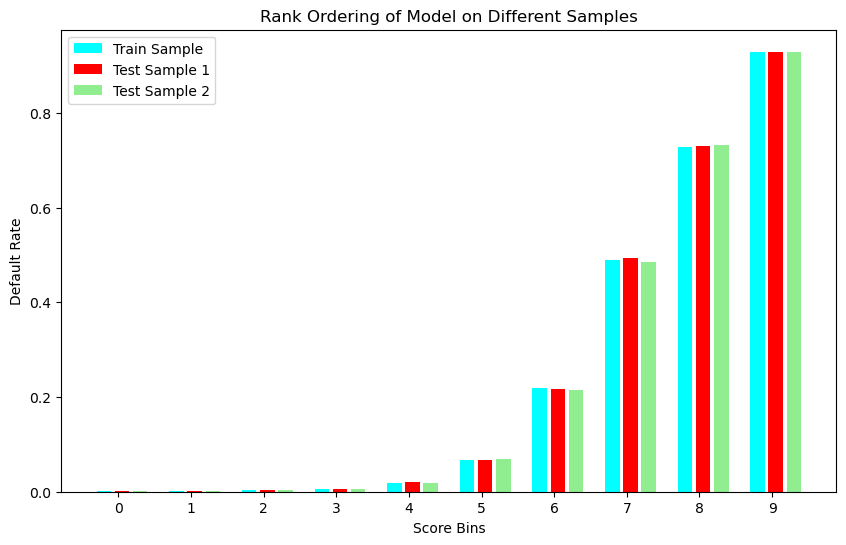

AUC on Train Sample: 0.9499641842063705
AUC on Test Sample 1: 0.9496528023994184
AUC on Test Sample 2: 0.9505720005072195


In [95]:
# Calculate AUC for each sample
train_auc = roc_auc_score(Y_train, best_nn_model.predict(X_train))
test1_auc = roc_auc_score(Y_test1, best_nn_model.predict(X_test1))
test2_auc = roc_auc_score(Y_test2, best_nn_model.predict(X_test2))

# Create score bins for each sample
train_bins = pd.qcut(best_nn_model.predict(X_train)[:, 0], q=10, labels=False, duplicates='drop')
test1_bins = pd.qcut(best_nn_model.predict(X_test1)[:, 0], q=10, labels=False, duplicates='drop')
test2_bins = pd.qcut(best_nn_model.predict(X_test2)[:, 0], q=10, labels=False, duplicates='drop')

# Calculate default rate in each bin for each sample
train_default_rate = [Y_train[train_bins == i].mean() for i in range(train_bins.max() + 1)]
test1_default_rate = [Y_test1[test1_bins == i].mean() for i in range(test1_bins.max() + 1)]
test2_default_rate = [Y_test2[test2_bins == i].mean() for i in range(test2_bins.max() + 1)]

# Plot the rank orderings in a bar chart with a gap between bars of the same bin
plt.figure(figsize=(10, 6))
index = np.arange(train_bins.max() + 1)
bar_width = 0.2  # Adjust the width of the bars
gap = 0.05  # Define the size of the gap between bars

plt.bar(index, train_default_rate, bar_width, color='cyan', label='Train Sample')
plt.bar(index + bar_width + gap, test1_default_rate, bar_width, color='red', label='Test Sample 1')
plt.bar(index + 2 * (bar_width + gap), test2_default_rate, bar_width, color='lightgreen', label='Test Sample 2')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Ordering of Model on Different Samples')
plt.xticks(index + bar_width, range(train_bins.max() + 1))
plt.legend()
plt.show()

# Display AUC of the model on each sample
print("AUC on Train Sample:", train_auc)
print("AUC on Test Sample 1:", test1_auc)
print("AUC on Test Sample 2:", test2_auc)


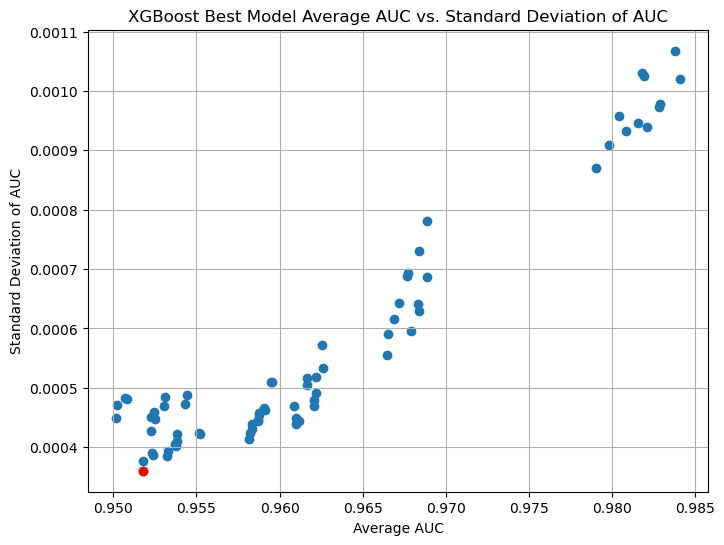

Parameters of the best point:
Number Trees         50.000000
Learning Rate         0.010000
Subsample             0.500000
% Features            0.500000
Weight of Default    10.000000
AUC Train             0.951920
AUC Test 1            0.951274
AUC Test 2            0.952118
AUC AVG               0.951771
AUC SD                0.000360
Name: 2, dtype: float64


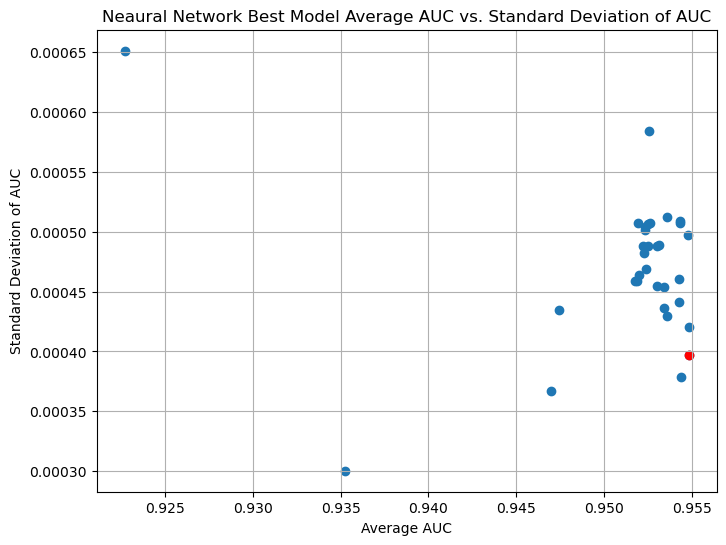

Parameters of the best point:
HL                            4
Nodes                         6
Activation Function        tanh
Dropout                     0.0
Batch Size                  100
AUC Train              0.954862
AUC Test 1             0.954323
AUC Test 2             0.955293
AUC AVG                0.954826
AUC SD                 0.000397
Name: 28, dtype: object


In [158]:
import matplotlib.pyplot as plt

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.figure(figsize=(8, 6))
plt.scatter(Grid_Search_Results['AUC AVG'], Grid_Search_Results['AUC SD'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('XGBoost Best Model Average AUC vs. Standard Deviation of AUC')
plt.grid(True)

# Find the lowest and highest points
lowest_index = Grid_Search_Results['AUC SD'].idxmin()

# Mark the lowest and highest points in red
plt.scatter(Grid_Search_Results.loc[lowest_index, 'AUC AVG'], Grid_Search_Results.loc[lowest_index, 'AUC SD'], color='red')

plt.show()

# Print the parameters of the lowest and highest points
print("Parameters of the best point:")
print(Grid_Search_Results.loc[lowest_index])

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.figure(figsize=(8, 6))
plt.scatter(Grid_Search_Results_nn['AUC AVG'], Grid_Search_Results_nn['AUC SD'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Neaural Network Best Model Average AUC vs. Standard Deviation of AUC')
plt.grid(True)

# Find the lowest and highest points
low_index = Grid_Search_Results_nn['AUC AVG'].idxmax()

# Mark the lowest and highest points in red
plt.scatter(Grid_Search_Results_nn.loc[low_index, 'AUC AVG'], Grid_Search_Results_nn.loc[low_index, 'AUC SD'], color='red')

plt.show()

# Print the parameters of the lowest and highest points
print("Parameters of the best point:")
print(Grid_Search_Results_nn.loc[low_index])



In [151]:
# Step 16: Choose final model
# NN is chosen

In [96]:
strategy_train = pd.DataFrame(columns=["Y", "Y_Hat"])
strategy_test_1 = pd.DataFrame(columns=["Y", "Y_Hat"])
strategy_test_2 = pd.DataFrame(columns=["Y", "Y_Hat"])

strategy_train["Y"] = Y_train
strategy_train["Y_Hat"] = best_nn_model.predict(X_train)

strategy_test_1["Y"] = Y_test1
strategy_test_1["Y_Hat"] = best_nn_model.predict(X_test1)

strategy_test_2["Y"] = Y_test2
strategy_test_2["Y_Hat"] = best_nn_model.predict(X_test2)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 14s 557us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 578us/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 3s 564us/step


In [97]:
strategy_train

,Y,Y_Hat
182769,0,0.264142
241802,0,0.001354
769241,0,0.002168
786784,0,0.069705
975133,0,0.016847
...,...,...
110268,0,0.001636
259178,1,0.625909
131932,1,0.974565
671155,0,0.006795


In [98]:
from sklearn.model_selection import train_test_split

A = development_sample.drop(['target'], axis=1)
B = development_sample['target']

# Splitting into 70% training and 30% testing
A_train, A_test_combined, B_train, B_test_combined = train_test_split(A, B, test_size=0.3, random_state=42)

# Splitting the combined test set into two equal parts
A_test1, A_test2, B_test1, B_test2 = train_test_split(A_test_combined, B_test_combined, test_size=0.5, random_state=42)

# Step 1: Create selected_train DataFrame
selected_train = A_train[['customer_ID', 'S_2', 'S_7', 'B_1']].copy()

# Step 2: Calculate average of "S_7" observations for the past 6 months
start_date = '2017-11-01'
end_date = '2018-04-30'

# Filter the data for the desired time frame
selected_train = A_train.loc[(A_train['S_2'] >= start_date) & (A_train['S_2'] <= end_date)]

# Calculate average of "S_7" for each "Customer_ID" and assign it to a new column "S_avg"
selected_train.loc[:, 'S_avg'] = selected_train.groupby('customer_ID')['S_7'].transform('mean')

# Display the resulting DataFrame with the "S_avg" column
print(selected_train['S_avg'])

# Step 3: Calculate average of "B_1" observations for the past 6 months
# Calculate average of "B_1" for each "Customer_ID" and assign it to a new column "B_avg"
selected_train.loc[:, 'B_avg'] = selected_train.groupby('customer_ID')['B_1'].transform('mean')

# Display the resulting DataFrame with the "S_avg" column
print(selected_train['B_avg'])

# Step 4: Drop unnecessary columns from selected_train
selected_train.drop(columns=['customer_ID','S_2', 'S_7', 'B_1'], inplace=True)

# Step 5: Merge selected_train with strategy_train on index
strategy_train_merged = pd.concat([strategy_train, selected_train[['S_avg', 'B_avg']]], axis=1)



# Step 1: Create selected_train DataFrame
selected_test1 = A_test1[['customer_ID', 'S_2', 'S_7', 'B_1']].copy()

# Step 2: Calculate average of "S_7" observations for the past 6 months
start_date = '2017-11-01'
end_date = '2018-04-30'

# Filter the data for the desired time frame
selected_test1 = A_test1.loc[(A_test1['S_2'] >= start_date) & (A_test1['S_2'] <= end_date)]

# Calculate average of "S_7" for each "Customer_ID" and assign it to a new column "S_avg"
selected_test1.loc[:, 'S_avg'] = selected_test1.groupby('customer_ID')['S_7'].transform('mean')

# Display the resulting DataFrame with the "S_avg" column
print(selected_test1['S_avg'])

# Step 3: Calculate average of "B_1" observations for the past 6 months

# Calculate average of "B_1" for each "Customer_ID" and assign it to a new column "B_avg"
selected_test1.loc[:, 'B_avg'] = selected_test1.groupby('customer_ID')['B_1'].transform('mean')

# Display the resulting DataFrame with the "S_avg" column
print(selected_test1['B_avg'])

# Step 4: Drop unnecessary columns from selected_train
selected_test1.drop(columns=['customer_ID','S_2', 'S_7', 'B_1'], inplace=True)

# Step 5: Merge selected_train with strategy_train on index
strategy_test1_merged = pd.concat([strategy_test_1, selected_test1[['S_avg', 'B_avg']]], axis=1)



# Step 1: Create selected_train DataFrame
selected_test2 = A_test2[['customer_ID', 'S_2', 'S_7', 'B_1']].copy()

# Step 2: Calculate average of "S_7" observations for the past 6 months
start_date = '2017-11-01'
end_date = '2018-04-30'

# Filter the data for the desired time frame
selected_test2 = A_test2.loc[(A_test2['S_2'] >= start_date) & (A_test2['S_2'] <= end_date)]

# Calculate average of "S_7" for each "Customer_ID" and assign it to a new column "S_avg"
selected_test2.loc[:, 'S_avg'] = selected_test2.groupby('customer_ID')['S_7'].transform('mean')

# Display the resulting DataFrame with the "S_avg" column
print(selected_test2['S_avg'])

# Step 3: Calculate average of "B_1" observations for the past 6 months

# Calculate average of "B_1" for each "Customer_ID" and assign it to a new column "B_avg"
selected_test2.loc[:, 'B_avg'] = selected_test2.groupby('customer_ID')['B_1'].transform('mean')

# Display the resulting DataFrame with the "S_avg" column
print(selected_test2['B_avg'])

# Step 4: Drop unnecessary columns from selected_train
selected_test2.drop(columns=['customer_ID','S_2', 'S_7', 'B_1'], inplace=True)

# Step 5: Merge selected_train with strategy_train on index
strategy_test2_merged = pd.concat([strategy_test_2, selected_test2[['S_avg', 'B_avg']]], axis=1)


/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/938358360.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_train.loc[:, 'S_avg'] = selected_train.groupby('customer_ID')['S_7'].transform('mean')
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/938358360.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_train.loc[:, 'B_avg'] = selected_train.groupby('customer_ID')['B_1'].transform('mean')


241802     0.064878
769241     0.080327
786784     0.175497
975133     0.062339
81824           NaN
             ...   
1103462    0.098164
732180     0.149281
110268     0.077830
259178     0.354480
121958          NaN
Name: S_avg, Length: 312504, dtype: float64
241802     0.016717
769241     0.026889
786784     0.218575
975133     0.055706
81824      0.005324
             ...   
1103462    0.021132
732180     0.425952
110268     0.033197
259178     0.218590
121958     0.003863
Name: B_avg, Length: 312504, dtype: float64


/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/938358360.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_train.drop(columns=['customer_ID','S_2', 'S_7', 'B_1'], inplace=True)
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/938358360.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_test1.loc[:, 'S_avg'] = selected_test1.groupby('customer_ID')['S_7'].transform('mean')
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/938358360.py:62: SettingWithCopyWarning: 
A value is trying to be set on a c

511209     0.940216
342128     0.078831
832937     0.178559
540399     0.311444
479893     0.456739
             ...   
1088455    0.083772
629725          NaN
442758          NaN
199403     0.208819
438669          NaN
Name: S_avg, Length: 66762, dtype: float64
511209     0.089921
342128     0.000038
832937     0.526407
540399     0.012561
479893     1.030117
             ...   
1088455    0.271493
629725     0.215103
442758     0.008393
199403     0.062492
438669     0.000787
Name: B_avg, Length: 66762, dtype: float64


/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/938358360.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_test2.loc[:, 'S_avg'] = selected_test2.groupby('customer_ID')['S_7'].transform('mean')
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/938358360.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_test2.loc[:, 'B_avg'] = selected_test2.groupby('customer_ID')['B_1'].transform('mean')
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/93

232514     0.332102
520289     0.170831
876576     0.094635
520085     0.136195
729722     0.342386
             ...   
706774     0.211208
1040061    0.314278
93933      0.101705
745020          NaN
618311     0.206422
Name: S_avg, Length: 67058, dtype: float64
232514     0.199858
520289     0.020743
876576     0.010807
520085     0.024248
729722     0.346610
             ...   
706774     0.229466
1040061    0.434076
93933      0.174237
745020     0.006861
618311     0.176401
Name: B_avg, Length: 67058, dtype: float64


In [124]:
X_train

,P_2_last,B_1_last,B_2_last,D_44_max,R_1_last,B_23_last,R_2_last,D_42_mean,P_2_min,B_23_mean,...,B_7_last,S_7_last,B_9_last,D_42_last,B_3_last,D_56,B_19,D_45_last,S_3_mean,D_66_max
0,-0.966288,1.349621,-1.117208,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.964070,-0.617020,...,-0.616784,-0.600578,1.675874,0.000000,0.079109,-0.586214,-0.502337,-0.680715,-0.580367,0.00000
1,1.011486,-0.514099,1.275019,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,0.867378,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,1.834790,-0.502337,-0.680715,-0.580367,0.00000
2,1.451301,-0.514099,1.221124,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.964070,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,-0.586214,-0.502337,1.894788,-0.580367,0.00000
3,0.018414,-0.366510,-1.117208,0.074036,-0.409942,1.973811,-0.290289,0.000000,-0.091535,1.904016,...,1.933199,-0.600578,-0.648251,0.000000,0.675470,-0.586214,2.170239,0.420610,-0.580367,0.00000
4,-0.646213,-0.514099,1.223138,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.338993,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,0.000000,-0.155421,0.889429,-0.580367,0.34991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774943,-0.677363,-0.514099,1.259559,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.078437,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,2.202494,-0.502337,1.894788,-0.580367,0.00000
774944,-0.966288,0.464614,-1.117208,2.245310,-0.409942,1.887451,-0.290289,-0.619731,-0.964070,0.953326,...,1.766785,-0.079756,1.675874,-0.622858,0.192511,0.000000,2.170239,-0.680715,2.082224,0.00000
774945,-0.966288,1.286021,-1.117208,1.138443,2.539664,1.973811,3.444838,0.000000,-0.964070,1.904016,...,1.933199,2.040392,1.675874,0.000000,2.084836,0.000000,-0.502337,1.894788,2.082224,0.00000
774946,-0.392221,-0.514099,1.224470,-0.565143,-0.409942,-0.605209,-0.290289,0.000000,-0.964070,-0.617020,...,-0.616784,-0.600578,-0.648251,0.000000,-0.559576,0.000000,-0.502337,-0.680715,-0.580367,0.00000


In [102]:
strategy_train_merged.fillna(0,inplace=True)
strategy_test1_merged.fillna(0,inplace=True)
strategy_test2_merged.fillna(0,inplace=True)

In [104]:
def estimate_portfolio(df_st, target, output, balance_col, spend_col, threshold):
    
    # Calculate accept and revenue
    df_st['accept'] = (df_st[output] < threshold).astype(int)  # Threshold
    df_st['revenue'] = (df_st[balance_col] * 0.02 + df_st[spend_col] * 0.001) * 12
    
    # Filter based on acceptance and non-defaulters
    df_accepted = df_st[(df_st['accept'] == 1)]
    
    # Calculate default rate
    exp_default_rate = df_accepted[target].sum() / df_accepted.shape[0]
    
    # Calculate expected revenue
    exp_revenue = (df_accepted.groupby(target).sum()[ ['revenue']]) ['revenue'][0]
    
    # Return results
    return exp_default_rate, exp_revenue, df_accepted.shape[0]


In [109]:

# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=["Threshold", "Default Rate", "Expected Revenue", "Accepted Customers"])

# Select the relevant columns for balance and spend
balance_column = 'B_avg'
spend_column = 'S_avg'

# Iterate over threshold values and calculate results
for threshold in np.arange(0.1, 1.01, 0.1):
    default_rate, expected_revenue, accepted_customers = estimate_portfolio(strategy_train_merged, "Y", "Y_Hat", balance_column, spend_column, threshold)
    results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)

# Check results
print(results_df.head())
results_df.to_csv("/Users/maverick/Downloads/BUAN 6341/Train_strategy.csv")

/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/2788503397.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/2788503397.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/2788503397.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

   Threshold  Default Rate  Expected Revenue  Accepted Customers
0        0.1      0.015930       1776.846629            461340.0
1        0.2      0.028032       2359.739588            505749.0
2        0.3      0.040336       2772.279951            533666.0
3        0.4      0.055367       3169.122230            559105.0
4        0.5      0.074443       3581.072031            586580.0


/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/2788503397.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)


In [111]:

# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=["Threshold", "Default Rate", "Expected Revenue", "Accepted Customers"])

# Select the relevant columns for balance and spend
balance_column = 'B_avg'
spend_column = 'S_avg'

# Iterate over threshold values and calculate results
for threshold in np.arange(0.1, 1.01, 0.1):
    default_rate, expected_revenue, accepted_customers = estimate_portfolio(strategy_test1_merged, "Y", "Y_Hat", balance_column, spend_column, threshold)
    results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)

# Check results
print(results_df.head())
results_df.to_csv("/Users/maverick/Downloads/BUAN 6341/Test1_strategy.csv")


   Threshold  Default Rate  Expected Revenue  Accepted Customers
0        0.1      0.016005        374.949871             98784.0
1        0.2      0.028581        496.055531            108500.0
2        0.3      0.040228        583.138637            114299.0
3        0.4      0.055262        667.191048            119702.0
4        0.5      0.074741        745.693107            125621.0


/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/273481794.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/273481794.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/273481794.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [110]:

# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=["Threshold", "Default Rate", "Expected Revenue", "Accepted Customers"])

# Select the relevant columns for balance and spend
balance_column = 'B_avg'
spend_column = 'S_avg'

# Iterate over threshold values and calculate results
for threshold in np.arange(0.1, 1.01, 0.1):
    default_rate, expected_revenue, accepted_customers = estimate_portfolio(strategy_test2_merged, "Y", "Y_Hat", balance_column, spend_column, threshold)
    results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)

# Check results
print(results_df.head())
results_df.to_csv("/Users/maverick/Downloads/BUAN 6341/Test2_strategy.csv")

   Threshold  Default Rate  Expected Revenue  Accepted Customers
0        0.1      0.015619        381.366460             98723.0
1        0.2      0.027555        508.163754            108364.0
2        0.3      0.039751        591.656881            114286.0
3        0.4      0.054191        676.537671            119743.0
4        0.5      0.073368        759.329617            125627.0


/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/1665544887.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/1665544887.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Threshold": threshold, "Default Rate": default_rate, "Expected Revenue": expected_revenue, "Accepted Customers": accepted_customers}, ignore_index=True)
/var/folders/qv/y6pfwcwd1vlc_bcbvh3nm1wh0000gn/T/ipykernel_9112/1665544887.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa